In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
from sklearn.datasets import make_regression
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report, plot_confusion_matrix
from sklearn.metrics import roc_curve, auc

In [2]:
df = pd.read_csv('Glassdoor Gender Pay Gap.csv')
df

,JobTitle,Gender,Education,Dept,Seniority,BasePay,Bonus,TotalComp
0,Graphic Designer,1,College,Operations,2,42363,9938,52301
1,Software Engineer,0,College,Management,5,108476,11128,119604
2,Warehouse Associate,1,PhD,Administration,5,90208,9268,99476
3,Software Engineer,0,Masters,Sales,4,108080,10154,118234
4,Graphic Designer,0,Masters,Engineering,5,99464,9319,108783
...,...,...,...,...,...,...,...,...
995,Marketing Associate,1,High School,Administration,1,62644,3270,65914
996,Data Scientist,0,Masters,Sales,2,108977,3567,112544
997,Financial Analyst,0,High School,Operations,1,92347,2724,95071
998,Financial Analyst,0,High School,Administration,1,97376,2225,99601


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   JobTitle   1000 non-null   object
 1   Gender     1000 non-null   int64 
 2   Education  1000 non-null   object
 3   Dept       1000 non-null   object
 4   Seniority  1000 non-null   int64 
 5   BasePay    1000 non-null   int64 
 6   Bonus      1000 non-null   int64 
 7   TotalComp  1000 non-null   int64 
dtypes: int64(5), object(3)
memory usage: 62.6+ KB


In [4]:
df.Dept.value_counts()

Operations        210
Sales             207
Management        198
Administration    193
Engineering       192
Name: Dept, dtype: int64

In [5]:
# This is one way to encode string values into numeric values
Dept_dict = {'Administration': 0, 'Operations': 1, 'Sales':2, "Engineering":3, "Management":4}
df2 = df.replace({'Dept': Dept_dict})
df2

,JobTitle,Gender,Education,Dept,Seniority,BasePay,Bonus,TotalComp
0,Graphic Designer,1,College,1,2,42363,9938,52301
1,Software Engineer,0,College,4,5,108476,11128,119604
2,Warehouse Associate,1,PhD,0,5,90208,9268,99476
3,Software Engineer,0,Masters,2,4,108080,10154,118234
4,Graphic Designer,0,Masters,3,5,99464,9319,108783
...,...,...,...,...,...,...,...,...
995,Marketing Associate,1,High School,0,1,62644,3270,65914
996,Data Scientist,0,Masters,2,2,108977,3567,112544
997,Financial Analyst,0,High School,1,1,92347,2724,95071
998,Financial Analyst,0,High School,0,1,97376,2225,99601


In [6]:
df.Education.value_counts()

High School    265
Masters        256
College        241
PhD            238
Name: Education, dtype: int64

In [7]:
ed_dict = {'High School': 0, 'College': 1, 'Masters':2, "PhD":3}
df3 = df.replace({'Education': ed_dict})
df3

,JobTitle,Gender,Education,Dept,Seniority,BasePay,Bonus,TotalComp
0,Graphic Designer,1,1,Operations,2,42363,9938,52301
1,Software Engineer,0,1,Management,5,108476,11128,119604
2,Warehouse Associate,1,3,Administration,5,90208,9268,99476
3,Software Engineer,0,2,Sales,4,108080,10154,118234
4,Graphic Designer,0,2,Engineering,5,99464,9319,108783
...,...,...,...,...,...,...,...,...
995,Marketing Associate,1,0,Administration,1,62644,3270,65914
996,Data Scientist,0,2,Sales,2,108977,3567,112544
997,Financial Analyst,0,0,Operations,1,92347,2724,95071
998,Financial Analyst,0,0,Administration,1,97376,2225,99601


In [8]:
# One-hot encoding the entire dataframe
X_dummies = pd.get_dummies(df3)
print(X_dummies.columns)
X_dummies

Index(['Gender', 'Education', 'Seniority', 'BasePay', 'Bonus', 'TotalComp',
       'JobTitle_Data Scientist', 'JobTitle_Driver',
       'JobTitle_Financial Analyst', 'JobTitle_Graphic Designer',
       'JobTitle_IT', 'JobTitle_Manager', 'JobTitle_Marketing Associate',
       'JobTitle_Sales Associate', 'JobTitle_Software Engineer',
       'JobTitle_Warehouse Associate', 'Dept_Administration',
       'Dept_Engineering', 'Dept_Management', 'Dept_Operations', 'Dept_Sales'],
      dtype='object')


,Gender,Education,Seniority,BasePay,Bonus,TotalComp,JobTitle_Data Scientist,JobTitle_Driver,JobTitle_Financial Analyst,JobTitle_Graphic Designer,...,JobTitle_Manager,JobTitle_Marketing Associate,JobTitle_Sales Associate,JobTitle_Software Engineer,JobTitle_Warehouse Associate,Dept_Administration,Dept_Engineering,Dept_Management,Dept_Operations,Dept_Sales
0,1,1,2,42363,9938,52301,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
1,0,1,5,108476,11128,119604,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
2,1,3,5,90208,9268,99476,0,0,0,0,...,0,0,0,0,1,1,0,0,0,0
3,0,2,4,108080,10154,118234,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
4,0,2,5,99464,9319,108783,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1,0,1,62644,3270,65914,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
996,0,2,2,108977,3567,112544,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
997,0,0,1,92347,2724,95071,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
998,0,0,1,97376,2225,99601,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0


In [9]:
X_dummies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                        Non-Null Count  Dtype
---  ------                        --------------  -----
 0   Gender                        1000 non-null   int64
 1   Education                     1000 non-null   int64
 2   Seniority                     1000 non-null   int64
 3   BasePay                       1000 non-null   int64
 4   Bonus                         1000 non-null   int64
 5   TotalComp                     1000 non-null   int64
 6   JobTitle_Data Scientist       1000 non-null   uint8
 7   JobTitle_Driver               1000 non-null   uint8
 8   JobTitle_Financial Analyst    1000 non-null   uint8
 9   JobTitle_Graphic Designer     1000 non-null   uint8
 10  JobTitle_IT                   1000 non-null   uint8
 11  JobTitle_Manager              1000 non-null   uint8
 12  JobTitle_Marketing Associate  1000 non-null   uint8
 13  JobTitle_Sales Associate      1000

In [26]:
(X_dummies.BasePay+X_dummies.Bonus) == X_dummies.TotalComp

0      True
1      True
2      True
3      True
4      True
       ... 
995    True
996    True
997    True
998    True
999    True
Length: 1000, dtype: bool

In [27]:
X = X_dummies.drop(["BasePay", "TotalComp"], axis=1)
y = X_dummies["BasePay"]

In [28]:
y

0       42363
1      108476
2       90208
3      108080
4       99464
        ...  
995     62644
996    108977
997     92347
998     97376
999    123108
Name: BasePay, Length: 1000, dtype: int64

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)


In [30]:
len(X_train)

750

In [31]:
X_dummies.BasePay.value_counts()

77584     2
77793     2
125770    2
100183    2
97376     2
         ..
116069    1
52578     1
81249     1
95584     1
67585     1
Name: BasePay, Length: 992, dtype: int64

In [32]:
X_train

,Gender,Education,Seniority,Bonus,JobTitle_Data Scientist,JobTitle_Driver,JobTitle_Financial Analyst,JobTitle_Graphic Designer,JobTitle_IT,JobTitle_Manager,JobTitle_Marketing Associate,JobTitle_Sales Associate,JobTitle_Software Engineer,JobTitle_Warehouse Associate,Dept_Administration,Dept_Engineering,Dept_Management,Dept_Operations,Dept_Sales
82,0,3,1,9931,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
991,1,2,1,2041,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
789,1,0,2,4829,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
894,1,0,1,3887,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
398,0,1,3,7614,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,0,3,1,9330,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
270,1,3,3,7776,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
860,0,3,3,4098,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0
435,0,3,1,7822,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0


In [33]:
reg = LinearRegression().fit(X_train, y_train)
reg.score(X_test, y_test)

0.5638906264421082

In [34]:
predictions = reg.predict(X_test)
predictions

array([105757.84256714, 139946.16403657, 106838.20175112, 113211.1823059 ,
       119262.64920489,  84861.52608679, 106867.61890145,  92205.02035881,
        93950.06388517,  96843.54611797,  98551.90427495,  85781.99997592,
       110378.89516311, 105437.50058802, 106505.77518575, 115482.13926646,
        84566.85931761,  92082.04679426,  82385.43358125, 109418.21732335,
       103971.85246661,  87902.68262594, 125612.77359986, 125689.0650499 ,
        73260.25332775,  84472.4399208 ,  99337.93337362,  96515.16035825,
       116534.17062383, 100978.05735953, 100107.48777343,  90281.19018294,
       103548.64145047,  90707.5061758 ,  85697.30348357,  64404.51021063,
        90330.88219445,  77057.25635344,  89732.98637291,  74581.89009532,
        82825.52642092, 106498.70181909,  77182.63354985,  80548.49568492,
       114902.90981418,  92297.14056936,  97038.6720452 ,  89329.73611275,
        73826.05246571,  96533.84226821, 122946.8974063 ,  97007.03649204,
        67691.10369442, 1

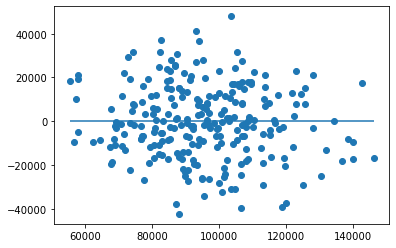

In [35]:
# Plot Residuals
plt.scatter(predictions, predictions - y_test)
plt.hlines(y=0, xmin=predictions.min(), xmax=predictions.max())
plt.show()

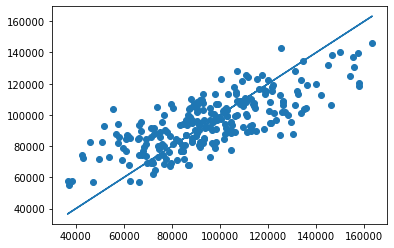

In [36]:
plt.scatter(y_test, predictions)
plt.plot(y_test, y_test)
plt.show()

In [ ]:
# newUserInput = [0,0,0,0,0,0,1,0,1,0.........]
# model.predict(newUserInput)
# salary_prediction = model.predict(newUserInput)
# print(salary_prediction)